In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('train.csv')
data

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

In [13]:
data.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  

In [14]:
data.shape

(8693, 14)

In [15]:
data.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [16]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

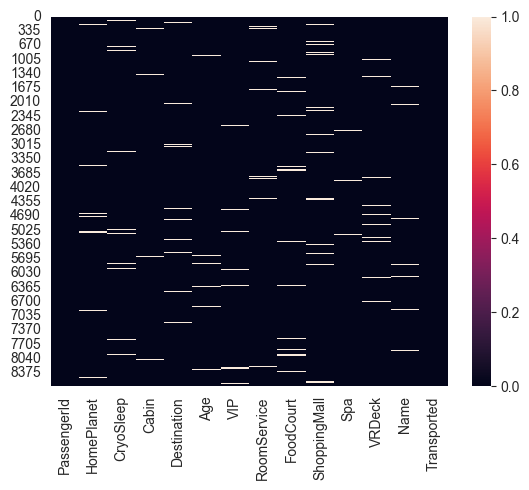

In [17]:
sns.heatmap(pd.isnull(data));

<AxesSubplot: >

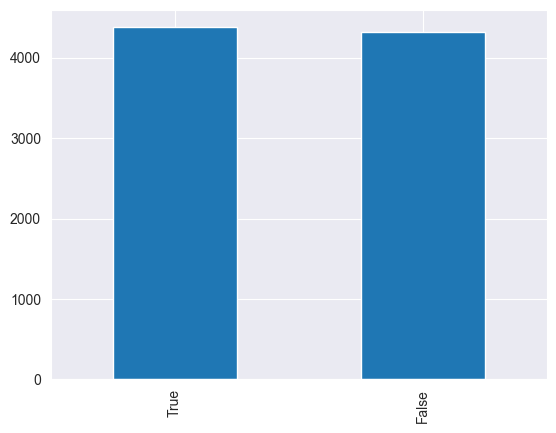

In [18]:
plot_df = data.Transported.value_counts()
plot_df.plot(kind="bar")

so the data is balanced

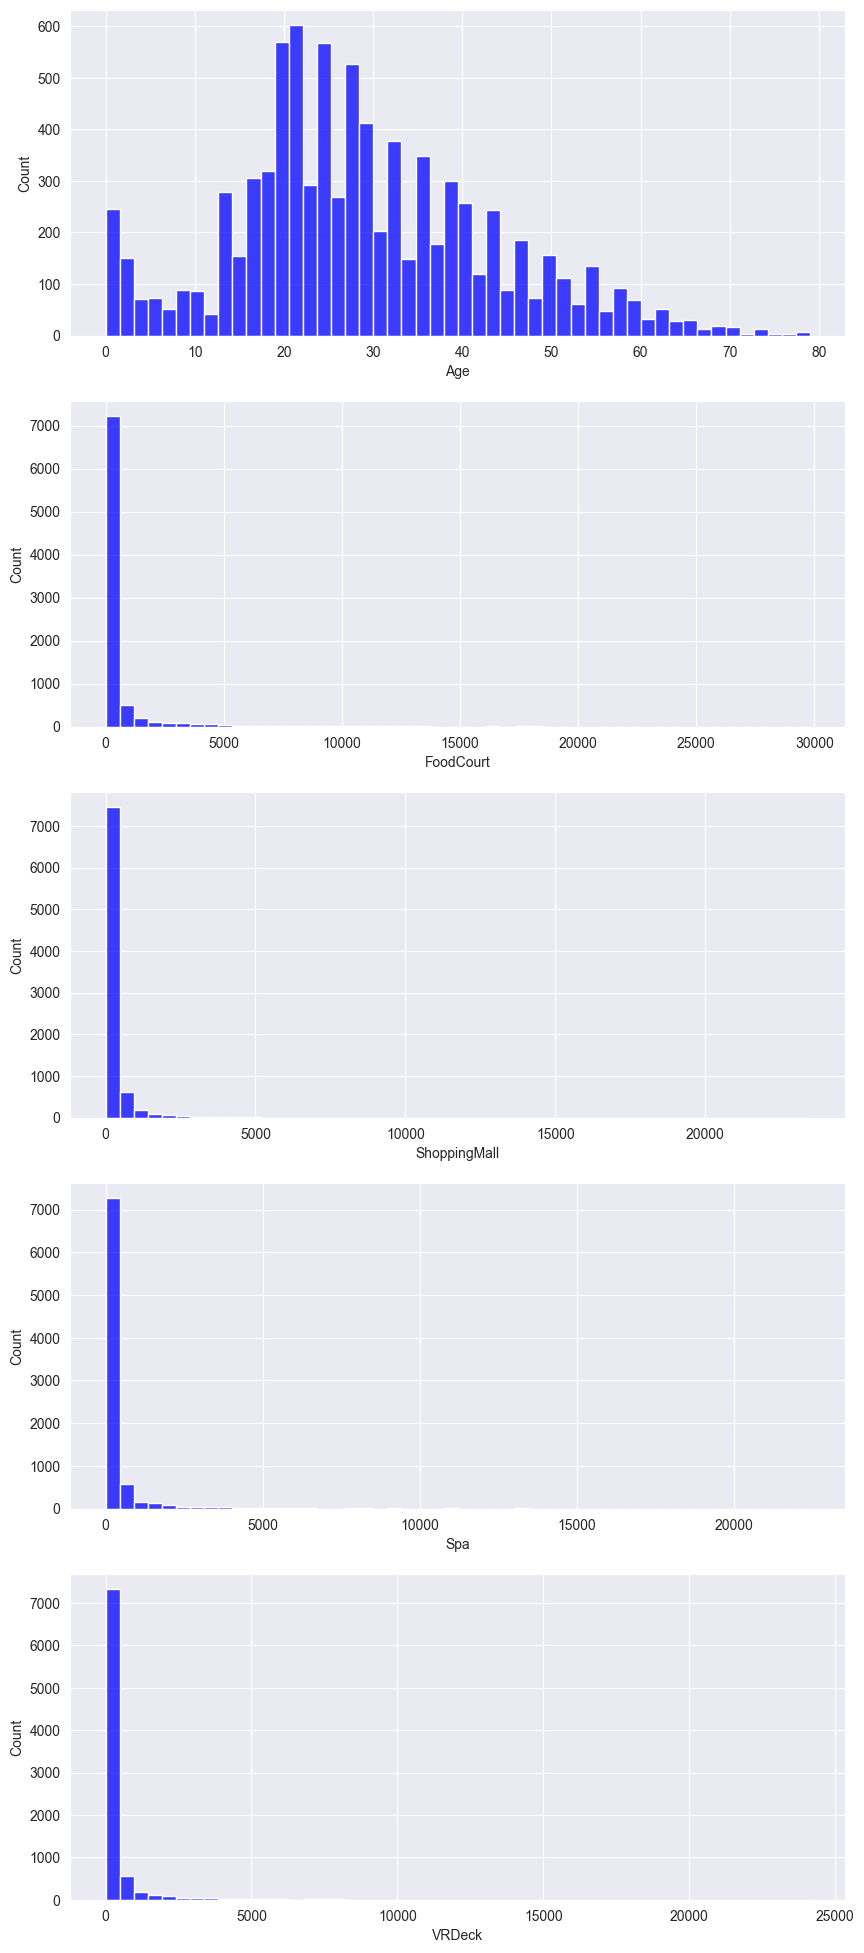

In [19]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(data['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(data['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(data['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(data['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(data['VRDeck'], color='b', bins=50, ax=ax[4]);


 Analyzing the graphs here, it turns out that the values of the variables are not normally distributed. 



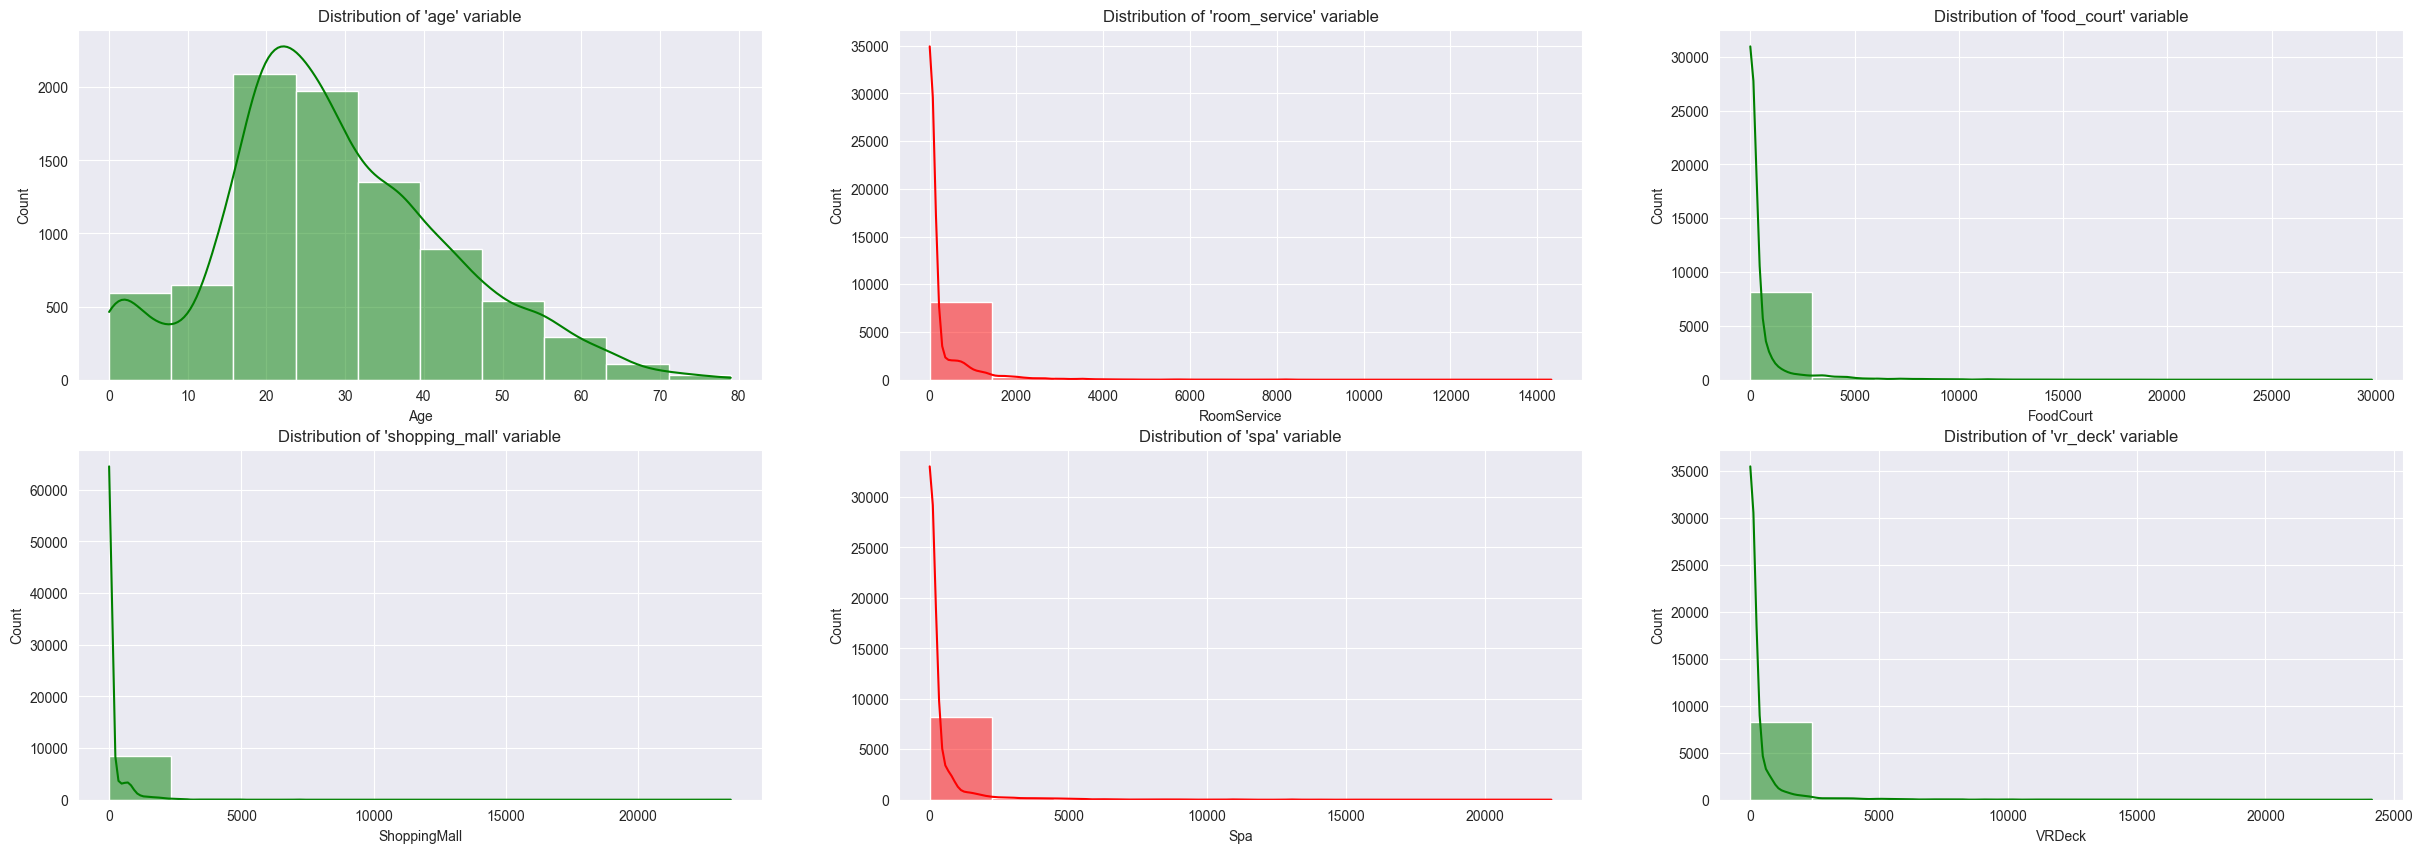

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10))
axes = axes.flatten()
sns.histplot(ax = axes[0], x = data["Age"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'age' variable");

sns.histplot(ax = axes[1], x = data["RoomService"],
             bins = 10,
             kde = True,
             color = "r").set(title = "Distribution of 'room_service' variable");

sns.histplot(ax = axes[2], x = data["FoodCourt"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'food_court' variable");

sns.histplot(ax = axes[3], x = data["ShoppingMall"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'shopping_mall' variable");

sns.histplot(ax = axes[4], x = data["Spa"],
             bins = 10,
             kde = True,
             color = "r").set(title = "Distribution of 'spa' variable");

sns.histplot(ax = axes[5], x = data["VRDeck"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'vr_deck' variable");

print("\n Analyzing the graphs here, it turns out that the values of the variables are not normally distributed. \n")

In [21]:
baby = data[data["Age"] <= 5]
kid = data[(data["Age"] > 5) & (data["Age"] <= 10)]
teenager = data[(data["Age"] > 10) & (data["Age"] <= 20)]
youth = data[(data["Age"] > 20) & (data["Age"] <= 40)]
adult = data[(data["Age"] > 40) & (data["Age"] <= 60)]
old = data[(data["Age"] > 60)]

print("Number of baby passengers: ", baby.shape[0])
print("Number of kid passengers: ", kid.shape[0])
print("Number of teenager passengers: ", teenager.shape[0])
print("Number of youth passengers: ", youth.shape[0])
print("Number of adult passengers: ", adult.shape[0])
print("Number of old passengers: ", old.shape[0])

Number of baby passengers:  499
Number of kid passengers:  219
Number of teenager passengers:  1717
Number of youth passengers:  4348
Number of adult passengers:  1511
Number of old passengers:  220


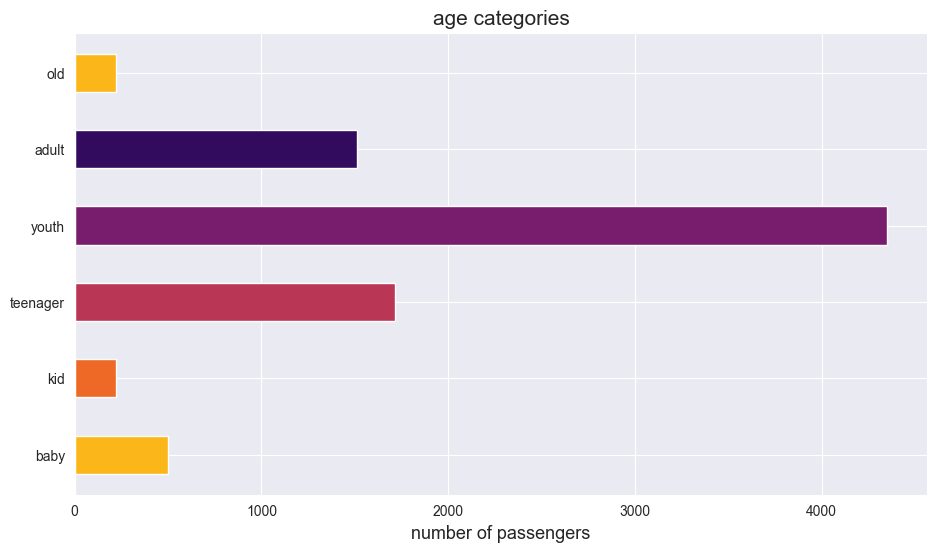

In [22]:
ages = {"baby" : baby.shape[0], "kid" : kid.shape[0],
        "teenager" : teenager.shape[0], "youth" : youth.shape[0],
        "adult" : adult.shape[0], "old" : old.shape[0]}
ages = pd.Series(ages)

plt.figure(figsize = (11, 6))
plt.title("age categories", fontsize = 15)
plt.xlabel("number of passengers", fontsize = 13)

plt.barh(ages.index, ages.values, color = sns.color_palette("inferno_r", 5),
         height = 0.5)
plt.show()

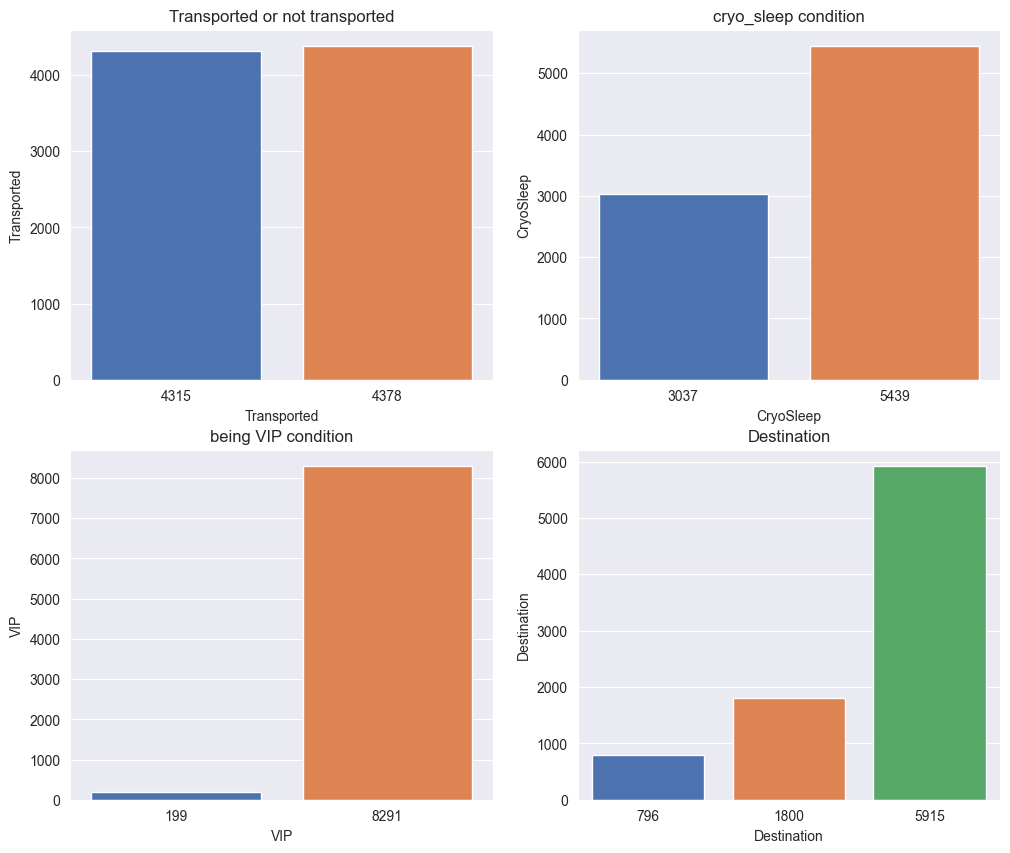

In [23]:
data["Transported"] = data["Transported"].replace(to_replace = [False, True],
                                  value = ["No", "Yes"])
data["VIP"] = data["VIP"].replace(to_replace = [False, True],
                                  value = ["No", "Yes"]).astype("object")
data["CryoSleep"] = data["CryoSleep"].replace(to_replace = [False, True],
                                  value = ["No", "Yes"]).astype("object")
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
axes = axes.flatten()
sns.set_theme(style = "whitegrid")
sns.barplot(ax = axes[0], x = data["Transported"].value_counts(),
            y = data["Transported"].value_counts(),
            data = data, saturation = 1).set(title = "Transported or not transported");

sns.barplot(ax = axes[1], x = data["CryoSleep"].value_counts(),
            y = data["CryoSleep"].value_counts(),
            data = data, saturation = 1).set(title = "cryo_sleep condition");

sns.barplot(ax = axes[2], x = data["VIP"].value_counts(),
            y = data["VIP"].value_counts(),
            data = data, saturation = 1).set(title = "being VIP condition");

sns.barplot(ax = axes[3], x = data["Destination"].value_counts(),
            y = data["Destination"].value_counts(),
            data = data, saturation = 1).set(title = "Destination");

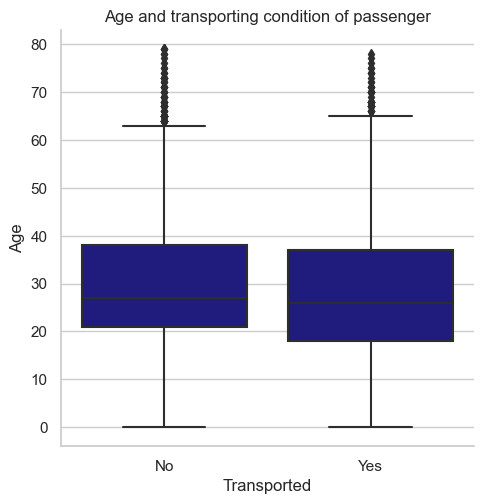

In [24]:
sns.catplot(x = "Transported",
            y = "Age",
            kind = "box",
            color = '#100C8E',
            data = data).set(title = "Age and transporting condition of passenger");

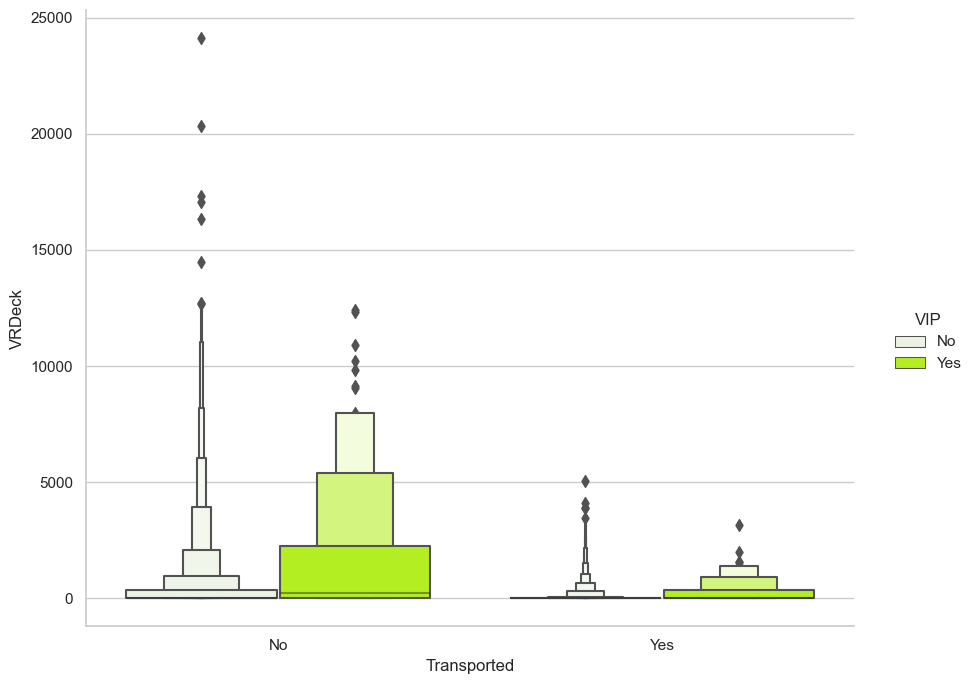

In [25]:
sns.catplot(x = "Transported",
            y = "VRDeck",
            kind = "boxen",
            hue = "VIP",
            ci = "sd",
            color = '#B3EE22',
            data = data, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True);

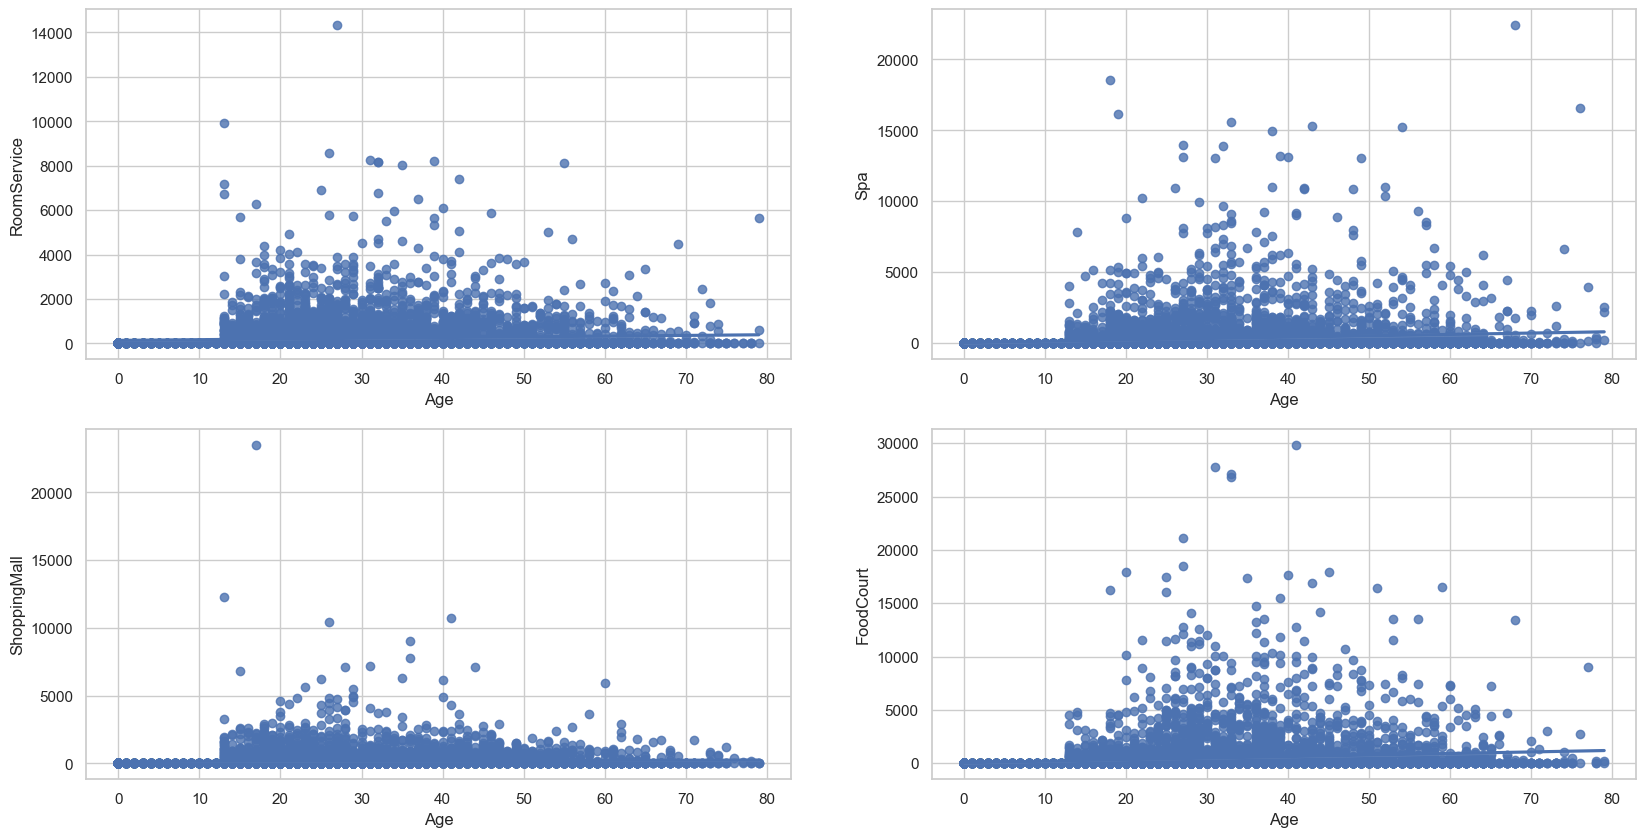

In [26]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "Age", y = "RoomService", data = data);
sns.regplot(ax = axes[1], x = "Age", y = "Spa", data = data);
sns.regplot(ax = axes[2], x = "Age", y = "ShoppingMall", data = data);
sns.regplot(ax = axes[3], x = "Age", y = "FoodCourt", data = data);

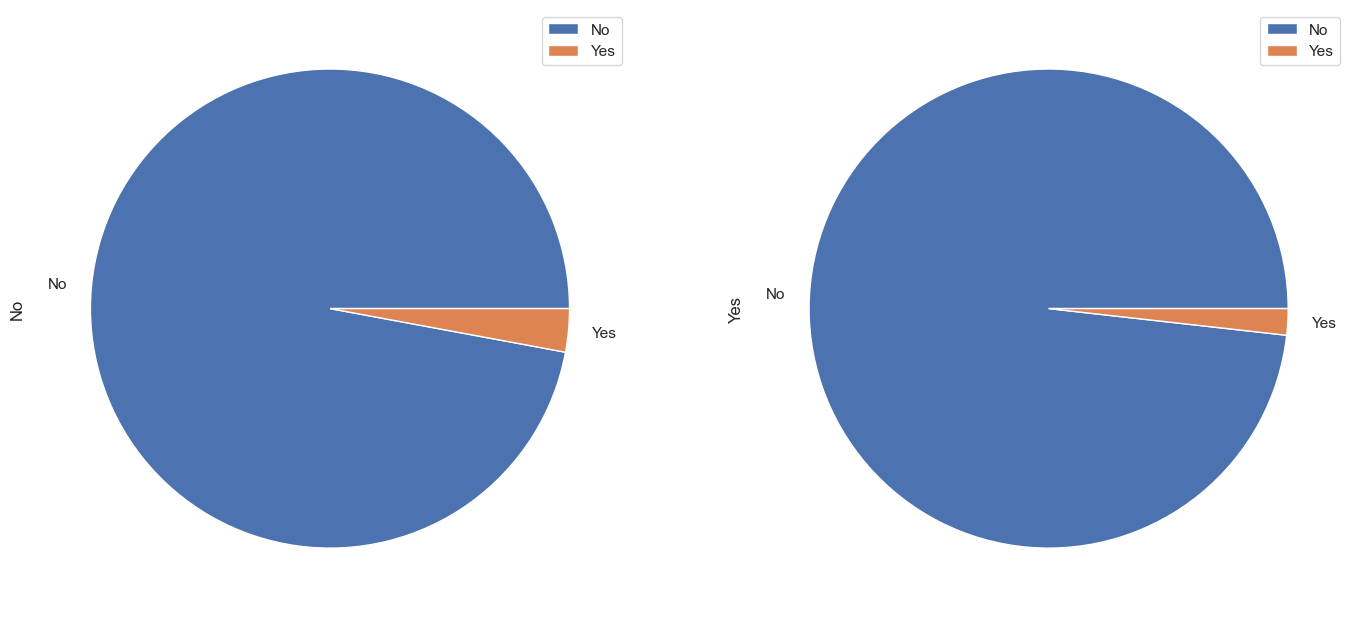

In [27]:
pd.crosstab(data["VIP"], data["Transported"],
            normalize = True).plot(kind = "pie",
                                   figsize = (17, 10), subplots = True, stacked=True);

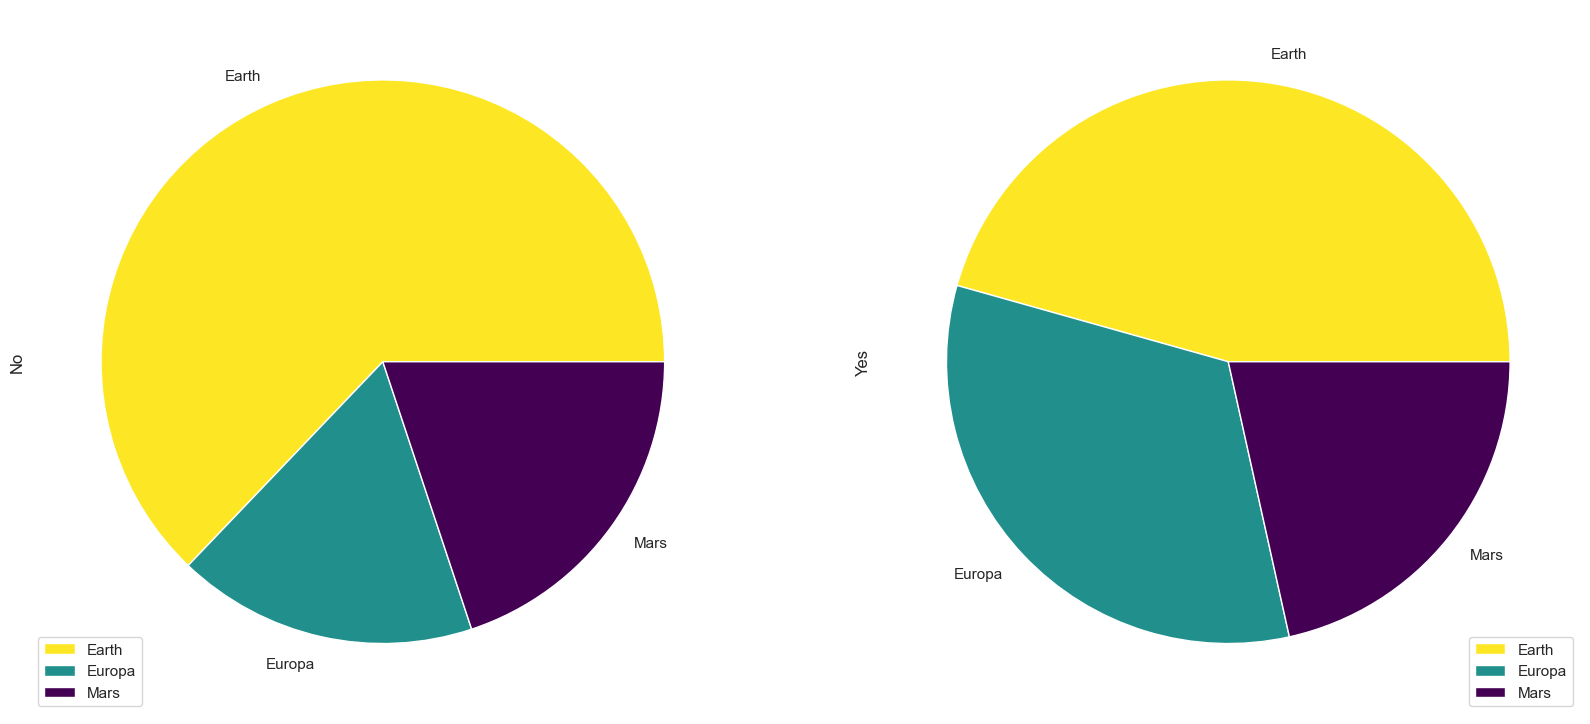

In [28]:
pd.crosstab(data["HomePlanet"], data["Transported"],
            normalize = True).plot(kind = "pie",
                                   figsize = (20, 20), colormap = "viridis_r",
                                   subplots = True, stacked=True);

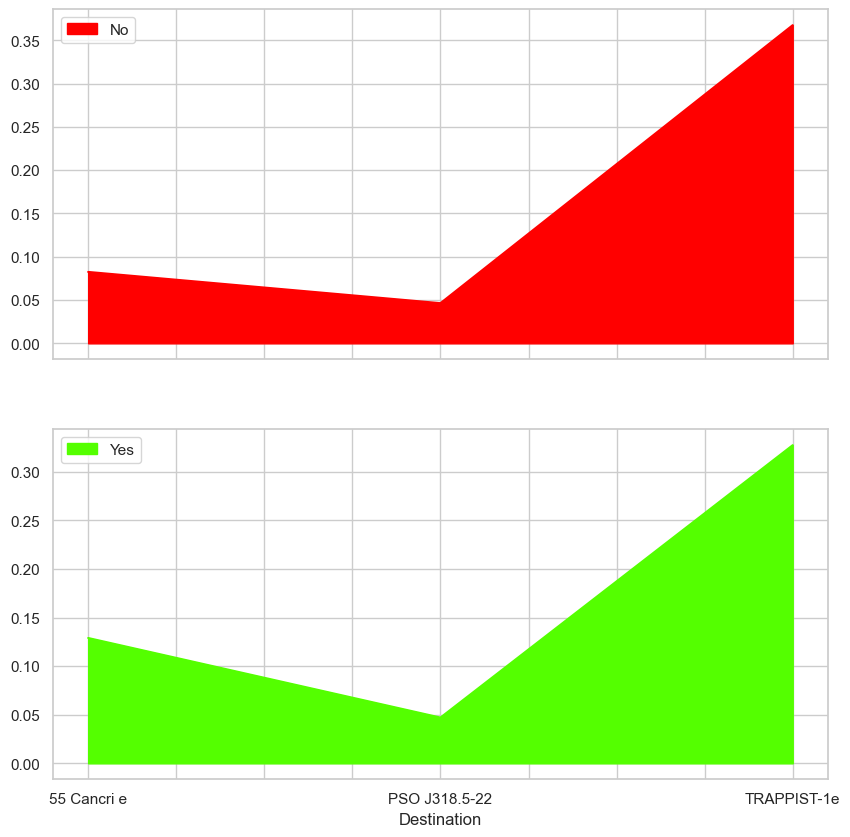

In [29]:
pd.crosstab(data["Destination"], data["Transported"],
            normalize = True).plot(kind = "area",
                                   figsize = (10, 10), colormap = "prism",
                                   subplots = True, stacked=True);

In [30]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
av = AutoViz_Class()
dftc = av.AutoViz(filename = '', sep = '', dfte = data)

     -------------------------------------- 67.5/67.5 kB 110.9 kB/s eta 0:00:00
     ------------                           102.4/300.2 kB 5.0 kB/s eta 0:00:40


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
   

ModuleNotFoundError: No module named 'autoviz'

In [33]:
import plotly.express as px
fig = px.histogram(data_frame = data,
                   x="Age",
                   color_discrete_sequence =  ['#58D68D','#DE3163'],
                   marginal="box",
                   nbins= 100,
                    template="plotly_white"
                )
fig.update_layout(title = "Distribution of Age" , title_x = 0.5)
fig.show()

In [34]:
numerical_cols=["Age","RoomService","Spa","VRDeck","ShoppingMall","FoodCourt"]
categorical_cols=[feature for feature in data.columns if feature not in numerical_cols]
for feature in categorical_cols:
    if feature not in['Passenger_group','firstname','last_name','Cabin_no.']:

        df=data[feature].value_counts().reset_index()

        fig=px.pie(df,values=df.columns[1],names=df.columns[0],
                   labels={"index":"<b>"+feature,feature:"Count"},
                  color_discrete_sequence=px.colors.qualitative.Pastel)

        fig.update_layout(title="<b>"+feature, title_font_size=30,
                         font_size=20,
                         title_x=0.5,legend_bordercolor="#000",legend_borderwidth=2,
                         hoverlabel_font_size=20)
        fig.update_traces(marker=dict( line=dict(color='#000000', width=2)))
        fig.show()

##Observation

__Homeplanet:__ most people was from Earth Followed by Europa, Mars

__Cryosleep:__ most people was not in CryoSleep

__Destination:__ mostly people was debarking to TRAPPIST-1e Followed by Canri e, PSO

__Vip:__ frequency of non VIP people quite large Compared VIP people

__Transported:__ no. of non transported is greater than transported people

__No.inGroup:__ Majority of the were travellling alone in their group

__Cabin Name:__ majority of people were in G and F cabin .

__Cabin side:__ NO of people on both sides is almost equal

In [35]:
for feature in categorical_cols:
     if feature not in['Passenger_group','firstname','last_name','Cabin_no.',"Transported"]:
        fig=px.histogram(data,x=feature,facet_col="Transported",color="Transported",color_discrete_sequence=px.colors.qualitative.Alphabet_r)
        fig.update_layout(title="<b>"+feature+" vs Transported", title_font_size=30,
                             font_size=20,
                             title_x=0.5,
                             hoverlabel_font_size=20,template="plotly_dark")

        fig.show()



# This is formattedObservation
Homeplanet - Europa amd marks has more transported people than Earth even though earth has more no. of people transported but it has lower transport %
Cryosleep - cryosleep people shows better transport percentage than non cryosleep people(so if you are in cryosleep you are most like be transported)
Destination- Trappist-1e has greate no of transported people but if we see who has better %of tranported people I will sayits 55 cancrie
Vip- Non Vip person has Equal chance of being on either side (tranported or non transported) but Vip has more than half the chance that they will not transported ..
Cabin - Deck B And C has more chance of getting transported . E has more chance of getting Not tranported.
Cabin Side - equal chance on both cabin being on either of side as code



In [36]:
for feature in numerical_cols:
    fig=px.violin(data,x=feature,color="Transported",title="<b>"+feature+" Distribution",template="plotly_dark" )
    fig.update_layout(hovermode='x',title_font_size=30)
    fig.update_layout(
    title_font_color="#ffff00",
    template="plotly_dark",
    title_font_size=30,
    hoverlabel_font_size=20,
    title_x=0.5
    )
    fig.show()

In [ ]:
for feature in numerical_cols:
    fig=px.histogram(data,x=feature,title="<b>"+feature+"Vs Transported",color="Transported",template="plotly_dark")
    fig.update_layout(hovermode='x',title_font_size=30)
    fig.update_layout(
    title_font_color="#ffff00",
    template="plotly_dark",
    title_font_size=30,
    hoverlabel_font_size=20,
    title_x=0.5)
    fig.show()

Obervation
skewed data(right)
all of them have outliers
Age show similar distribution except when age is b/w 0-4 where people were transported very much large than no transported why this age is zero??

In [ ]:
data["Transported"] = data["Transported"].replace(to_replace = ["No", "Yes"],
                                  value = [False, True])
fig=px.parallel_coordinates(data,color="Transported",title="<b>Multivariate plot for Numerical Data", color_continuous_scale='Viridis',
                              range_color=(0, 1))
fig.update_layout(title_font_size=30,title_x=0.5)

Cant see very strong relatioship in any of the numerical features

In [ ]:
data[["Cabin_deck","Cabin_no.","Cabin_side"]]=data["Cabin"].str.split("/",expand=True)
fig=px.imshow(
    pd.crosstab(data["Cabin_deck"],data["Cabin_side"]).T
    ,text_auto=True,title="No. of people Travelling in (Cabin_DecK,Cabin_side)",
    labels={"color":"<b>No.of people"},color_continuous_scale=px.colors.sequential.haline_r)
fig.update_layout(font_size=15,font_color="#ffcce6",
                 title_font_size=30,title_font_color="Orange",template="plotly_dark")
fig.show()

In [ ]:
fig=px.imshow(
    pd.crosstab(data["Cabin_deck"],data["Cabin_side"],data["Transported"],aggfunc="mean").round(3).T
    ,text_auto=True,title="% of people Transported(1) in (Cabin_DecK,Cabin_side)",
    labels={"color":"<b>%Transpoted"},color_continuous_scale=px.colors.sequential.haline_r)
fig.update_layout(font_size=15,font_color="#ffcce6",
                 title_font_size=30,title_font_color="Orange",template="plotly_dark")
fig.show()

Obseravtion

Not so much of difference in these categories , I think not much of useful information here

In [ ]:
fig=px.imshow(
    pd.crosstab(data["HomePlanet"],data["CryoSleep"]).T
    ,text_auto=True,title="<b>No. of people Travelling in (HomePlanet,Cryosleep)",
    labels={"color":"<b>No.of people"},color_continuous_scale=px.colors.sequential.haline_r)
fig.update_layout(font_size=15,font_color="#ffcce6",
                 title_font_size=30,title_font_color="Orange",template="plotly_dark")
fig.show()

In [ ]:
fig=px.imshow(
    pd.crosstab(data["HomePlanet"],data["CryoSleep"],data["Transported"],aggfunc="mean").round(3).T
    ,text_auto=True,title="<b>No. of people Travelling in (HomePlanet,Cryosleep)",
    labels={"color":"<b>%Transpoted"},color_continuous_scale=px.colors.sequential.haline_r)
fig.update_layout(font_size=15,font_color="#ffcce6",
                 title_font_size=30,title_font_color="Orange",template="plotly_dark")
fig.show()

Observation

Europa - Cryosleep people has 99% chance they will get transported , and non crysleep has only 40% chance

Mars - cryosleep people has 91 % cahnce and non cryosleep has only 27 %

In [ ]:
data = pd.read_csv('/train.csv')

name and passenger id would not help us to improve our model so we drop them.

In [ ]:
data = data.drop(['PassengerId', 'Name'], axis=1)
data

In [ ]:
sns.heatmap(pd.isnull(data));

In [ ]:
data['HomePlanet'].fillna(data['HomePlanet'].mode()[0], inplace=True)
data.isnull().sum()

In [ ]:
data['CryoSleep'].fillna(data['CryoSleep'].mode()[0], inplace=True)
data.isnull().sum()

In [ ]:
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)
data.isnull().sum()

In [ ]:
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)
data.isnull().sum()

In [ ]:
data['Destination'].fillna(data['Destination'].mode()[0], inplace=True)
data.isnull().sum()

In [ ]:
data['VIP'].fillna(data['VIP'].mode()[0], inplace=True)
data.isnull().sum()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan)
temp = data[["Age","RoomService","Spa","VRDeck","ShoppingMall","FoodCourt"]]
data = data.drop(["Age","RoomService","Spa","VRDeck","ShoppingMall","FoodCourt"], axis=1)
temp = pd.DataFrame(imputer.fit_transform(temp), columns=temp.columns, index=temp.index)
temp.isnull().sum()

In [ ]:
data = pd.DataFrame(pd.concat([data, temp], axis=1))
data.isnull().sum()

In [ ]:
data.shape

In [ ]:
data.drop_duplicates()